**The objective is to create a predictive model that accurately estimates the crop yield per acre for rice or wheat crops in India. The model will assist smallholder farmers in making informed decisions regarding planting, resource allocation, and adaptive farming practices to break the cycle of poverty and malnutrition.**


#### for this project we will  supervised learning techniques since we already know our target "rop yield per acre" and we will use some regressions since the target is a continuous  data 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Data Understanding and Exploration

In [2]:
# Load files
data_path = ''
train = pd.read_csv(data_path + 'Train.csv')
var_desc = pd.read_csv(data_path + 'VariableDescription.csv')

In [3]:
var_desc

,Variable,Description
0,District,Name of the district
1,Block,Name of the block
2,CultLand,Area of total cultivated land
3,CropCultLand,Area of land under cultivation
4,LandPreparationMethod,Method for land preparation
5,CropTillageDate,Date of tillage of the largest plot
6,CropTillageDepth,Depth of the tillage
7,CropEstMethod,Method of transplantation
8,RcNursEstDate,Date of nursery establishment
9,SeedingSowingTransplanting,Crop establishment method - sowing/transplanting


In [4]:
# Display the first few rows of the dataset
train.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,...,machine,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,...,hand,2022-11-25,3.0,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,...,hand,2022-12-12,480.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,...,hand,2022-12-02,240.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,...,machine,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550


In [5]:
# Get information about the dataset
# for the info we can see we have missing data and the type of the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  3870 non-null   object 
 1   District                            3870 non-null   object 
 2   Block                               3870 non-null   object 
 3   CultLand                            3870 non-null   int64  
 4   CropCultLand                        3870 non-null   int64  
 5   LandPreparationMethod               3870 non-null   object 
 6   CropTillageDate                     3870 non-null   object 
 7   CropTillageDepth                    3870 non-null   int64  
 8   CropEstMethod                       3870 non-null   object 
 9   RcNursEstDate                       3787 non-null   object 
 10  SeedingSowingTransplanting          3870 non-null   object 
 11  SeedlingsPerPit                     3581 no

In [6]:
# Generate summary statistics of the dataset
train.describe()

,CultLand,CropCultLand,CropTillageDepth,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,StandingWater,Ganaura,CropOrgFYM,NoFertilizerAppln,...,BasalUrea,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,Harv_hand_rent,Residue_length,Residue_perc,Acre,Yield
count,3870.000000,3870.000000,3870.000000,3581.000000,3677.000000,2988.000000,3632.000000,1453.000000,1196.000000,3870.000000,...,2166.000000,3314.000000,3314.000000,1176.000000,1170.000000,3618.000000,3870.000000,3870.000000,3870.000000,3870.000000
mean,28.527907,24.727132,4.488372,2.706507,8.017677,379.726908,3.247522,29.731590,57.445652,2.184496,...,13.351801,11.513881,29.200362,7.375000,58.764957,536.622443,26.517829,11.767442,0.292826,594.269251
std,30.454218,27.994802,1.133044,7.624397,42.612470,419.724782,2.207276,122.680882,328.251615,0.634632,...,9.701597,8.715856,12.139109,5.932502,11.356588,1138.613827,3.192873,7.064864,0.206918,651.916953
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,10.000000,0.045455,4.000000
25%,12.000000,10.000000,4.000000,2.000000,2.000000,150.000000,2.000000,1.000000,1.000000,2.000000,...,7.000000,6.000000,23.000000,4.000000,58.000000,150.000000,25.000000,10.000000,0.156250,300.000000
50%,20.000000,20.000000,4.000000,2.000000,4.000000,250.000000,3.000000,3.000000,2.000000,2.000000,...,10.000000,10.000000,28.000000,6.000000,60.000000,400.000000,26.000000,10.000000,0.227273,425.000000
75%,35.000000,30.000000,5.000000,3.000000,6.000000,450.000000,4.000000,4.000000,5.000000,3.000000,...,16.000000,15.000000,36.000000,10.000000,65.000000,700.000000,30.000000,10.000000,0.370370,740.000000
max,800.000000,800.000000,8.000000,442.000000,2000.000000,6000.000000,15.000000,1400.000000,4000.000000,4.000000,...,90.000000,90.000000,332.000000,67.000000,97.000000,60000.000000,30.000000,40.000000,2.187500,16800.000000


#### Feature Analysis: Explore the features (columns) in the dataset and their distributions. Calculate basic statistical measures on each feature such as mean, median, standard deviation, and skewness. Identify any potential outliers, missing values, or inconsistencies in the data.

In [7]:
train.mean()

C:\Users\vtebo\AppData\Local\Temp\ipykernel_12100\3309660196.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.mean()


CultLand                         28.527907
CropCultLand                     24.727132
CropTillageDepth                  4.488372
SeedlingsPerPit                   2.706507
TransplantingIrrigationHours      8.017677
TransIrriCost                   379.726908
StandingWater                     3.247522
Ganaura                          29.731590
CropOrgFYM                       57.445652
NoFertilizerAppln                 2.184496
BasalDAP                         11.452359
BasalUrea                        13.351801
1tdUrea                          11.513881
1appDaysUrea                     29.200362
2tdUrea                           7.375000
2appDaysUrea                     58.764957
Harv_hand_rent                  536.622443
Residue_length                   26.517829
Residue_perc                     11.767442
Acre                              0.292826
Yield                           594.269251
dtype: float64

In [8]:
train.median()

C:\Users\vtebo\AppData\Local\Temp\ipykernel_12100\4279898166.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.median()


CultLand                         20.000000
CropCultLand                     20.000000
CropTillageDepth                  4.000000
SeedlingsPerPit                   2.000000
TransplantingIrrigationHours      4.000000
TransIrriCost                   250.000000
StandingWater                     3.000000
Ganaura                           3.000000
CropOrgFYM                        2.000000
NoFertilizerAppln                 2.000000
BasalDAP                         10.000000
BasalUrea                        10.000000
1tdUrea                          10.000000
1appDaysUrea                     28.000000
2tdUrea                           6.000000
2appDaysUrea                     60.000000
Harv_hand_rent                  400.000000
Residue_length                   26.000000
Residue_perc                     10.000000
Acre                              0.227273
Yield                           425.000000
dtype: float64

In [9]:
train.std()

C:\Users\vtebo\AppData\Local\Temp\ipykernel_12100\4021786378.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.std()


CultLand                          30.454218
CropCultLand                      27.994802
CropTillageDepth                   1.133044
SeedlingsPerPit                    7.624397
TransplantingIrrigationHours      42.612470
TransIrriCost                    419.724782
StandingWater                      2.207276
Ganaura                          122.680882
CropOrgFYM                       328.251615
NoFertilizerAppln                  0.634632
BasalDAP                           8.422049
BasalUrea                          9.701597
1tdUrea                            8.715856
1appDaysUrea                      12.139109
2tdUrea                            5.932502
2appDaysUrea                      11.356588
Harv_hand_rent                  1138.613827
Residue_length                     3.192873
Residue_perc                       7.064864
Acre                               0.206918
Yield                            651.916953
dtype: float64

In [10]:
train.skew()
#  function in pandas is used to calculate the skewness of a dataset. 
# Skewness is a measure of the asymmetry of the distribution of a variable

C:\Users\vtebo\AppData\Local\Temp\ipykernel_12100\3783917777.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.skew()


CultLand                         8.178796
CropCultLand                     8.796317
CropTillageDepth                 0.340277
SeedlingsPerPit                 53.528364
TransplantingIrrigationHours    30.754264
TransIrriCost                    3.912326
StandingWater                    1.848641
Ganaura                          5.237242
CropOrgFYM                       6.876849
NoFertilizerAppln               -0.132321
BasalDAP                         2.905715
BasalUrea                        2.244465
1tdUrea                          2.094479
1appDaysUrea                     4.769872
2tdUrea                          2.696580
2appDaysUrea                    -1.589283
Harv_hand_rent                  39.973453
Residue_length                  -1.880371
Residue_perc                     3.747956
Acre                             2.384037
Yield                            9.357193
dtype: float64

In [11]:
# Iterate through each column in the dataset
from scipy.stats import zscore
def outliers(train):
#     train=pd.read_csv(path)
    for column in train.columns:
        # Check if the column contains numerical data
        if np.issubdtype(train[column].dtype, np.number):
            # Calculate the Z-scores of the column
            z_scores = zscore(train[column])

            # Identify the outliers based on a threshold
            outliers = train[abs(z_scores) > 4]  # Adjust the threshold as required

            # Print column name and outlier count
            return print(f"Column '{column}' has {len(outliers)} outliers.\n")


In [12]:
outliers(train)

Column 'CultLand' has 24 outliers.



In [13]:
# Define the IQR method with missing value imputation
def remove_outliers_iqr(train, columns, factor=1.5):
    numeric_columns = train.select_dtypes(include=np.number).columns
    for column in columns:
        if column in numeric_columns:
            # Perform missing value imputation with column median
            median = train[column].median()
            train[column].fillna(median, inplace=True)

            # Calculate the IQR and bounds
            Q1 = train[column].quantile(0.25)
            Q3 = train[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - (factor * IQR)
            upper_bound = Q3 + (factor * IQR)

            # Remove outliers within the bounds
            train = train[(train[column] >= lower_bound) & (train[column] <= upper_bound)]
    return train

# List of columns to remove outliers from
columns = train.columns

# Remove outliers using the IQR method with missing value imputation
clean_df = remove_outliers_iqr(train, columns, factor=1.5)

C:\Users\vtebo\AppData\Local\Temp\ipykernel_12100\2213047673.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[column].fillna(median, inplace=True)


### Correlation Analysis

In [14]:

train.corr()
# from the correlation we can see they are independant variable that are strongly corelated betweeen them which is not good 

,CultLand,CropCultLand,CropTillageDepth,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,StandingWater,Ganaura,CropOrgFYM,NoFertilizerAppln,...,BasalUrea,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,Harv_hand_rent,Residue_length,Residue_perc,Acre,Yield
CultLand,1.000000,0.969350,0.024248,-0.048345,0.017224,-0.026350,0.171613,0.017384,0.004560,-0.042980,...,0.377142,0.449973,0.169518,0.287679,0.046797,0.093408,-0.117823,0.381639,0.409604,0.254201
CropCultLand,0.969350,1.000000,0.035786,-0.043010,0.008620,-0.009245,0.203042,0.024456,0.046272,-0.066414,...,0.359221,0.437093,0.182472,0.178640,0.050996,0.068229,-0.119789,0.370456,0.394070,0.246221
CropTillageDepth,0.024248,0.035786,1.000000,-0.048160,0.013533,-0.164576,-0.132753,0.179586,0.208100,-0.121384,...,0.034944,0.013097,0.216424,-0.162743,-0.032072,0.039687,-0.027913,-0.167916,-0.001449,-0.002953
SeedlingsPerPit,-0.048345,-0.043010,-0.048160,1.000000,-0.004252,0.037066,-0.013302,-0.020345,0.071110,-0.033294,...,-0.072365,-0.031459,-0.024683,-0.048817,0.017489,-0.023879,0.033023,-0.018989,-0.033684,-0.023557
TransplantingIrrigationHours,0.017224,0.008620,0.013533,-0.004252,1.000000,0.125979,-0.068434,0.014478,0.026567,0.035796,...,0.036301,0.022539,0.003003,0.019404,-0.127031,0.015802,0.041072,0.006777,0.017651,-0.007763
TransIrriCost,-0.026350,-0.009245,-0.164576,0.037066,0.125979,1.000000,-0.169588,-0.120001,0.606718,0.045348,...,0.286765,0.122852,-0.168597,0.145310,-0.110523,0.098437,0.062878,-0.019887,0.381061,0.274761
StandingWater,0.171613,0.203042,-0.132753,-0.013302,-0.068434,-0.169588,1.000000,-0.129067,-0.057793,-0.269534,...,0.053836,0.156344,0.285711,0.006033,0.194153,-0.003548,-0.169711,0.020989,0.031833,0.000103
Ganaura,0.017384,0.024456,0.179586,-0.020345,0.014478,-0.120001,-0.129067,1.000000,0.647287,-0.068061,...,-0.102336,-0.076371,-0.103807,0.042108,0.005574,-0.023180,-0.273999,0.014435,-0.088846,-0.040204
CropOrgFYM,0.004560,0.046272,0.208100,0.071110,0.026567,0.606718,-0.057793,0.647287,1.000000,-0.223009,...,0.461624,0.281865,-0.109821,0.311710,0.086100,0.132168,-0.099817,-0.019349,0.447550,0.372322
NoFertilizerAppln,-0.042980,-0.066414,-0.121384,-0.033294,0.035796,0.045348,-0.269534,-0.068061,-0.223009,1.000000,...,-0.098576,-0.306572,-0.125879,-0.003029,-0.013039,-0.005958,0.195066,-0.029513,-0.011640,-0.020704


<AxesSubplot:>

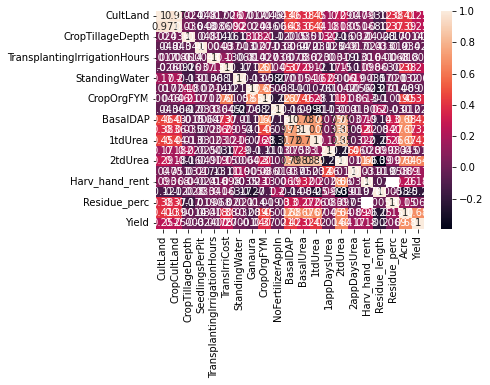

In [15]:
import seaborn as sns
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=True)


### Data Visualization

In [16]:
train.columns

Index(['ID', 'District', 'Block', 'CultLand', 'CropCultLand',
       'LandPreparationMethod', 'CropTillageDate', 'CropTillageDepth',
       'CropEstMethod', 'RcNursEstDate', 'SeedingSowingTransplanting',
       'SeedlingsPerPit', 'NursDetFactor', 'TransDetFactor',
       'TransplantingIrrigationHours', 'TransplantingIrrigationSource',
       'TransplantingIrrigationPowerSource', 'TransIrriCost', 'StandingWater',
       'OrgFertilizers', 'Ganaura', 'CropOrgFYM', 'PCropSolidOrgFertAppMethod',
       'NoFertilizerAppln', 'CropbasalFerts', 'BasalDAP', 'BasalUrea',
       'MineralFertAppMethod', 'FirstTopDressFert', '1tdUrea', '1appDaysUrea',
       '2tdUrea', '2appDaysUrea', 'MineralFertAppMethod.1', 'Harv_method',
       'Harv_date', 'Harv_hand_rent', 'Threshing_date', 'Threshing_method',
       'Residue_length', 'Residue_perc', 'Stubble_use', 'Acre', 'Yield'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

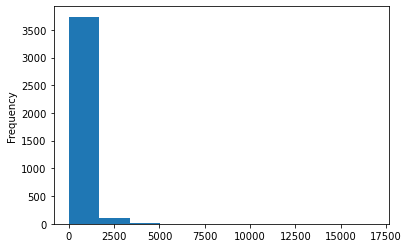

In [17]:
  # Histogram of crop yield per acre
train['Yield'].plot.hist()

<AxesSubplot:title={'center':'Yield'}, xlabel='District'>

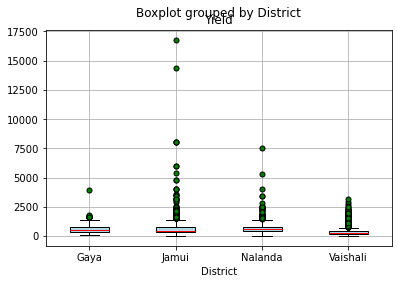

In [18]:
# Box plot of crop yield by region
train.boxplot(column='Yield', by='District', patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='red'),
            flierprops=dict(marker='o', markersize=5, markerfacecolor='green'))


## Data Preprocessing and Cleaning

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  3870 non-null   object 
 1   District                            3870 non-null   object 
 2   Block                               3870 non-null   object 
 3   CultLand                            3870 non-null   int64  
 4   CropCultLand                        3870 non-null   int64  
 5   LandPreparationMethod               3870 non-null   object 
 6   CropTillageDate                     3870 non-null   object 
 7   CropTillageDepth                    3870 non-null   int64  
 8   CropEstMethod                       3870 non-null   object 
 9   RcNursEstDate                       3787 non-null   object 
 10  SeedingSowingTransplanting          3870 non-null   object 
 11  SeedlingsPerPit                     3581 no

In [20]:
mask = correlation_matrix.abs() > 0.5

<AxesSubplot:>

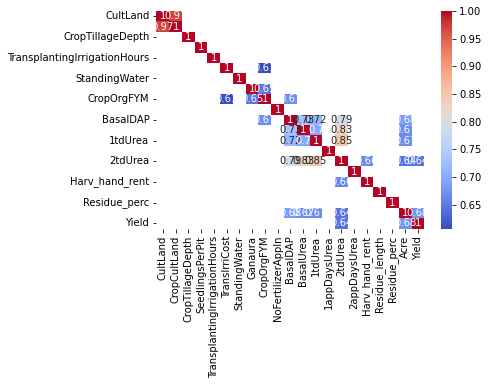

In [21]:
sns.heatmap(correlation_matrix[mask], annot=True, cmap='coolwarm')

In [22]:
# Iterate through each column in the dataset
from scipy.stats import zscore
def outliers(train):
#     train=pd.read_csv(path)
    for column in train.columns:
        # Check if the column contains numerical data
        if np.issubdtype(train[column].dtype, np.number):
            # Calculate the Z-scores of the column
            z_scores = zscore(train[column])

            # Identify the outliers based on a threshold
            outliers = train[abs(z_scores) > 4]  # Adjust the threshold as required

            # Print column name and outlier count
            return print(f"Column '{column}' has {len(outliers)} outliers.\n")

In [23]:
outliers(train)

Column 'CultLand' has 24 outliers.



In [24]:
def cleaned(path):
    df=pd.read_csv(path)
    #     **Handling Missing Values:** 
    # Drop rows or columns with missing values
    df1=df.drop(columns=['Ganaura','2appDaysUrea','2tdUrea','CropOrgFYM'],axis=1)  # Drops columns with missing values
    df2=df1.drop(columns=['CultLand','BasalDAP','BasalUrea','1tdUrea'],axis=1)  # Drops multicolinearity
    df3=df2.dropna()  # Drops rows with missing values
    return df3
    
      

In [25]:
train=cleaned('Train.csv')

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1687 entries, 2 to 3861
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  1687 non-null   object 
 1   District                            1687 non-null   object 
 2   Block                               1687 non-null   object 
 3   CropCultLand                        1687 non-null   int64  
 4   LandPreparationMethod               1687 non-null   object 
 5   CropTillageDate                     1687 non-null   object 
 6   CropTillageDepth                    1687 non-null   int64  
 7   CropEstMethod                       1687 non-null   object 
 8   RcNursEstDate                       1687 non-null   object 
 9   SeedingSowingTransplanting          1687 non-null   object 
 10  SeedlingsPerPit                     1687 non-null   float64
 11  NursDetFactor                       1687 no

In [27]:
# Define the IQR method with missing value imputation
def remove_outliers_iqr(train, columns, factor=1.5):
    numeric_columns = train.select_dtypes(include=np.number).columns
    for column in columns:
        if column in numeric_columns:
            # Perform missing value imputation with column median
            median = train[column].median()
            train[column].fillna(median, inplace=True)

            # Calculate the IQR and bounds
            Q1 = train[column].quantile(0.25)
            Q3 = train[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - (factor * IQR)
            upper_bound = Q3 + (factor * IQR)

            # Remove outliers within the bounds
            train = train[(train[column] >= lower_bound) & (train[column] <= upper_bound)]
    return train

# List of columns to remove outliers from
columns = train.columns

# Remove outliers using the IQR method with missing value imputation
clean_df = remove_outliers_iqr(train, columns, factor=1.5)

C:\Users\vtebo\AppData\Local\Temp\ipykernel_12100\2213047673.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[column].fillna(median, inplace=True)


In [28]:
train=clean_df
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 19 to 3860
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  895 non-null    object 
 1   District                            895 non-null    object 
 2   Block                               895 non-null    object 
 3   CropCultLand                        895 non-null    int64  
 4   LandPreparationMethod               895 non-null    object 
 5   CropTillageDate                     895 non-null    object 
 6   CropTillageDepth                    895 non-null    int64  
 7   CropEstMethod                       895 non-null    object 
 8   RcNursEstDate                       895 non-null    object 
 9   SeedingSowingTransplanting          895 non-null    object 
 10  SeedlingsPerPit                     895 non-null    float64
 11  NursDetFactor                       895 non

<AxesSubplot:title={'center':'Yield'}, xlabel='District'>

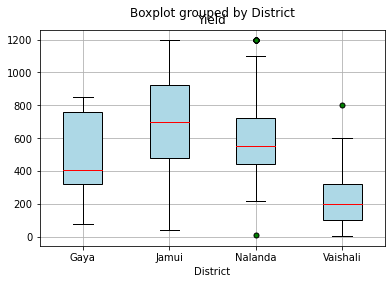

In [29]:
# Box plot of crop yield by region
train.boxplot(column='Yield', by='District', patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='red'),
            flierprops=dict(marker='o', markersize=5, markerfacecolor='green'))

## Model Development and Training

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
 

In [31]:
# Split data for training and local testing

X = train.drop(['ID', 'Yield'], axis = 1)
X =X.select_dtypes(include=np.number)
y = train.Yield

 # Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate model
Rnd_model = RandomForestRegressor(random_state = 42)

# Fit model
Rnd_model.fit(X_train, y_train)

# Make predictions
preds = Rnd_model.predict(X_val)

# Measure model performance
mean_squared_error(y_val, preds, squared=False)

78.51817703227833

In [32]:
# Measure model performance
mae = mean_absolute_error(y_val, preds)
mae

48.97052895273566

In [33]:
# Instantiate model
Ln_model = LinearRegression()

# Fit model
Ln_model.fit(X_train, y_train)

# Make predictions
preds = Ln_model.predict(X_val)

# Measure model performance
ln_sqrt=mean_squared_error(y_val, preds, squared=False)
mae1 = mean_absolute_error(y_val, preds)

In [34]:
ln_sqrt

100.62862009421555

In [35]:
mae1

73.22421590250102

In [36]:
# Instantiate model
model = DecisionTreeRegressor(random_state=42)

# Fit model
model.fit(X_train, y_train)

# Make predictions
preds = model.predict(X_val)

# Measure model performance
rmse = mean_squared_error(y_val, preds, squared=False)

In [37]:
rmse

111.18569811882318

In [38]:
# Instantiate model
Gb_model = GradientBoostingRegressor(random_state=42)

# Fit model
Gb_model.fit(X_train, y_train)

# Make predictions
preds = Gb_model.predict(X_val)

# Measure model performance
rmse = mean_squared_error(y_val, preds, squared=False)
mae1 = mean_absolute_error(y_val, preds)

In [39]:
rmse

88.60314943460207

In [40]:
mae1

52.7750682876067

In [41]:
# # Make predictions on the Zindi test set
# test_df = test[X.columns]
# preds = model.predict(test_df.fillna(0))

# # Create submisiion file to be uploaded to Zindi for scoring
# sub = pd.DataFrame({'ID': test.ID, 'Yield': preds})
# sub.to_csv('BenchmarkSubmission.csv', index = False)

# sub.head()

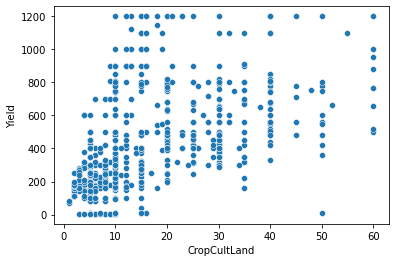

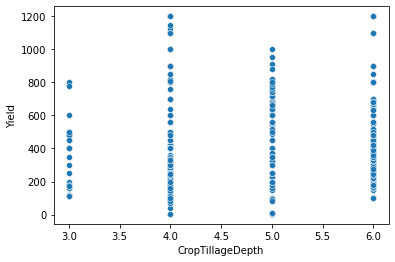

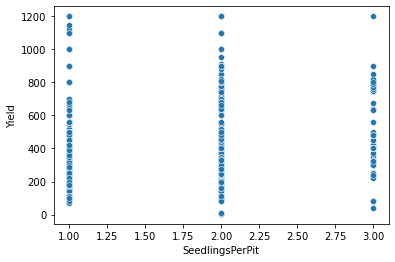

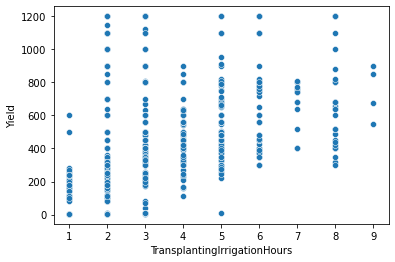

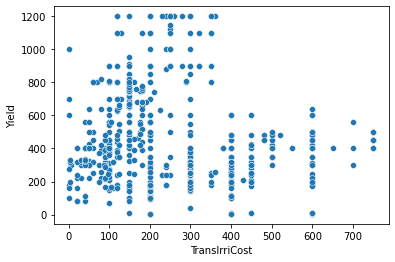

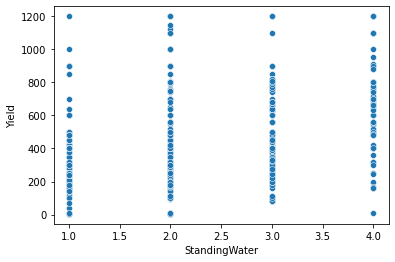

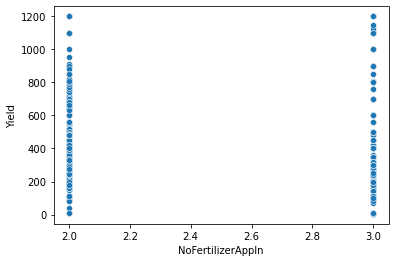

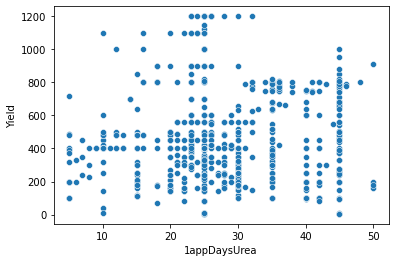

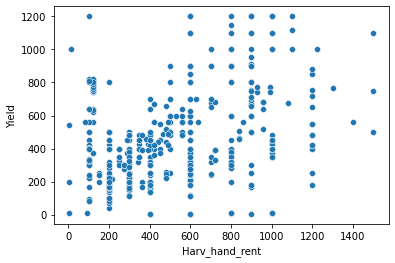

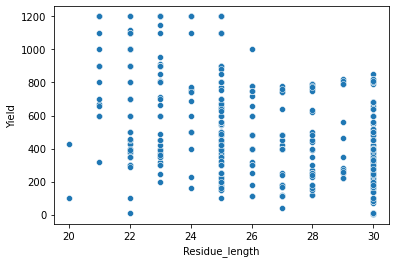

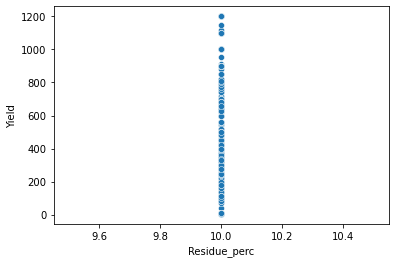

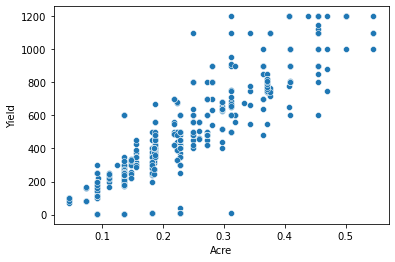

<Figure size 432x288 with 0 Axes>

In [42]:
numeric_data = list(train._get_numeric_data())
for i in range(len(numeric_data)-1):    
    sns.scatterplot(x=numeric_data[i],y='Yield', data=train, palette='winter')
    plt.figure()

In [43]:
train['Residue_perc'] = train['Residue_perc'].astype('int')

In [44]:
train['NoFertilizerAppln'] = train['NoFertilizerAppln'].astype('int')

In [45]:
# # Make predictions on the Zindi test set
# test_df = test[X.columns]
# preds = Rnd_model.predict(test_df.fillna(0))

# # Create submisiion file to be uploaded to Zindi for scoring
# sub = pd.DataFrame({'ID': test.ID, 'Yield': preds})
# sub.to_csv('BenchmarkSubmission.csv', index = False)

# sub.head()